Importar las librerias necesarias para realizar el análisis exploratorio de datos.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Leer los datos

In [3]:
df= pd.read_csv('/content/drive/MyDrive/CSVs/sitios_hoteles.csv' ) #sitios

## ANALISIS DE CALIDAD DE LOS DATOS

### Visión General

Comprender las dimensiones del dataset visaulizando las primeras 5 filas.

In [ ]:
df.head(5)

,Unnamed: 0,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url,url_origen,etl_timestamp
0,0,Basecamp Guesthouse,"Basecamp Guesthouse, 49010 SE Middle Fork Rd, ...",0x54907fca2751e187:0x3d6ae31ac18da483,NaN,47.471332,-121.686928,['Hotel'],5.0,8,NaN,NaN,NaN,NaN,"['0x54907c35e89f333f:0x121a0cbfbbb39d3a', '0x5...",https://www.google.com/maps/place//data=!4m2!3...,d:/Henry/Proyecto Final/Data/Sitios/1.json,2023-02-22 01:53:02
1,1,Jjironwork,"Jjironwork, 3009 Teagarden St, San Leandro, CA...",0x808f8f8390b886c1:0x619ddd0e9f523f2,NaN,37.703918,-122.155917,['Lodging'],5.0,1,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/place//data=!4m2!3...,d:/Henry/Proyecto Final/Data/Sitios/1.json,2023-02-22 01:53:02
2,2,Falls Inn,"Falls Inn, 4248 State Rte 5, Newton Falls, OH ...",0x88315d25d1d76083:0x2287ef0f3bb138cb,NaN,41.213304,-80.954071,['Motel'],3.9,8,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/place//data=!4m2!3...,d:/Henry/Proyecto Final/Data/Sitios/1.json,2023-02-22 01:53:02
3,3,Breezy Hill Mobile Home Park,"Breezy Hill Mobile Home Park, 115 Mobile Ln, F...",0x89ab6f460e78ea29:0x53b49b783bc54dd9,NaN,35.149431,-78.919828,['Lodging'],3.6,8,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/place//data=!4m2!3...,d:/Henry/Proyecto Final/Data/Sitios/1.json,2023-02-22 01:53:02
4,4,Pine Tree Masonic Lodge,"Pine Tree Masonic Lodge, 2709 Pine Tree Rd, Lo...",0x8636395522622a8b:0x73638992e1d8c645,NaN,32.534913,-94.808631,['Lodge'],4.3,8,NaN,NaN,NaN,NaN,"['0x86363885f8016657:0x7a7c429db9ca9422', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,d:/Henry/Proyecto Final/Data/Sitios/1.json,2023-02-22 01:53:02


Eliminamos las 2 columnas que se generaron en el proceso de extracción y filtrado. 

In [ ]:
df.drop(['Unnamed: 0', 'url_origen'], axis=1,inplace=True)

¿Qué tamaño tiene el dataframe?

In [ ]:
df.shape

(16047, 16)


¿Qué tipo de datos contiene cada columna? 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16047 entries, 0 to 16046
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16046 non-null  object 
 1   address           15981 non-null  object 
 2   gmap_id           16047 non-null  object 
 3   description       2120 non-null   object 
 4   latitude          16047 non-null  float64
 5   longitude         16047 non-null  float64
 6   category          16047 non-null  object 
 7   avg_rating        16047 non-null  float64
 8   num_of_reviews    16047 non-null  int64  
 9   price             18 non-null     object 
 10  hours             255 non-null    object 
 11  MISC              2749 non-null   object 
 12  state             261 non-null    object 
 13  relative_results  11825 non-null  object 
 14  url               16047 non-null  object 
 15  etl_timestamp     16047 non-null  object 
dtypes: float64(3), int64(1), object(12)
memo

¿Cuantas dimensiones de cada tipo de dato tenemos en el dataframe?

In [ ]:
df.dtypes.value_counts()

object     12
float64     3
int64       1
dtype: int64

###Valores Faltantes 

Analicemos los valores nulos ¿Cuántos valores nulos tenemos en el total en el conjunto de datos?

In [ ]:
df.isnull().sum().sum()

79121

¿Cuántos tenemos por cada dimensión?

In [ ]:
df.isnull().sum()

name                    1
address                66
gmap_id                 0
description         13927
latitude                0
longitude               0
category                0
avg_rating              0
num_of_reviews          0
price               16029
hours               15792
MISC                13298
state               15786
relative_results     4222
url                     0
etl_timestamp           0
dtype: int64

Graficamente observamos los valores nulos 

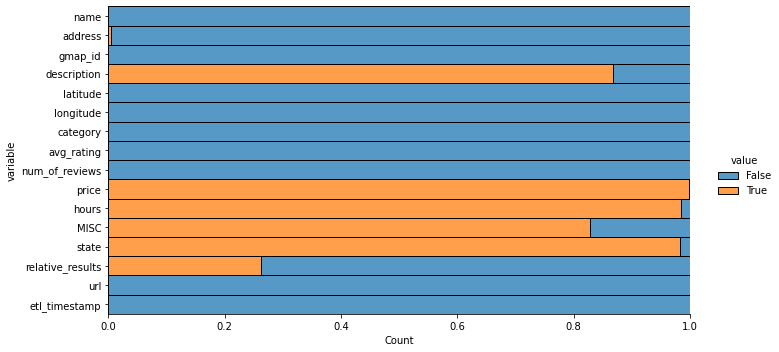

In [ ]:
(df.isnull().melt().pipe(lambda df: (sns.displot(data=df,y='variable',hue='value',multiple='fill',aspect=2))))

### Análisis de presición (errores en los datos)

Vemos  en su mayoria los puntos de lat y long se encuentran dentro del  por lo que los valores para encontrarse dentro de EEUU deben estar entre

Latitud : 18.9 y 71.383
Longitud: -66.95 y -172.43

In [ ]:
df.latitude.min(),df.latitude.max(),df.longitude.min(),df.longitude.max()

(18.9886992, 71.2888583, -176.6350331, -67.5648709)

¿Cuántos valores se encuentran fuera del rango?

Latitud : 18.9 y 71.383 Longitud: -66.95 y -172.43



In [ ]:
#Latitud
len(df[df['latitude']< 18.9 ]) , len(df[df['latitude']> 71.383 ]) 

(0, 0)

In [ ]:
#Longitud
len(df[df['longitude']> -66.95]) , len(df[df['longitude']< -172.83]) 

(0, 1)

### Valores duplicados

Analizamos si existen registros duplicados en todo el dataframe. Obviamente obtenemos cero por el id único por registro. 


In [ ]:
df.duplicated().sum()

152

Analizamos las coincidencias teniendo en cuenta determinadas columnas.

In [ ]:
df.duplicated(subset=['name','address','latitude','longitude']).sum()

152

### Valores Atípicos

#### Variables Numéricas

Visión General

In [ ]:
df.describe()

,latitude,longitude,avg_rating,num_of_reviews
count,16047.000000,16047.000000,16047.000000,16047.000000
mean,37.610086,-94.353248,4.140992,27.913192
std,6.393191,17.502313,0.839854,142.056193
min,18.988699,-176.635033,1.000000,1.000000
25%,33.479116,-105.674560,3.700000,4.000000
50%,37.646724,-89.495099,4.400000,8.000000
75%,41.860661,-81.560363,4.800000,26.000000
max,71.288858,-67.564871,5.000000,8668.000000


#####Num_of_reviews

Observar la distribución de los datos en la columna num_of_reviews

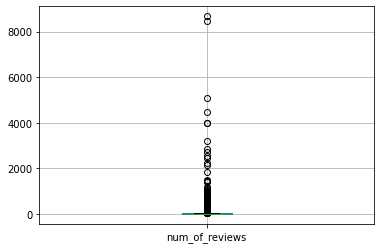

In [4]:
boxplot = df.boxplot(column='num_of_reviews')
  

(0.0, 100.0)

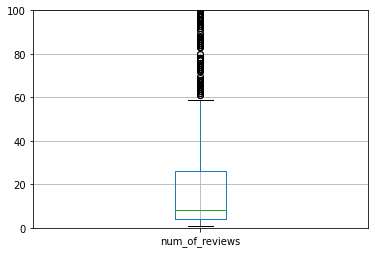

In [9]:
fig, ax = plt.subplots()
boxplot = df.boxplot(column='num_of_reviews')
ax.set_ylim(0, 100)


Vemos que los valores se concentran en el limite inferior

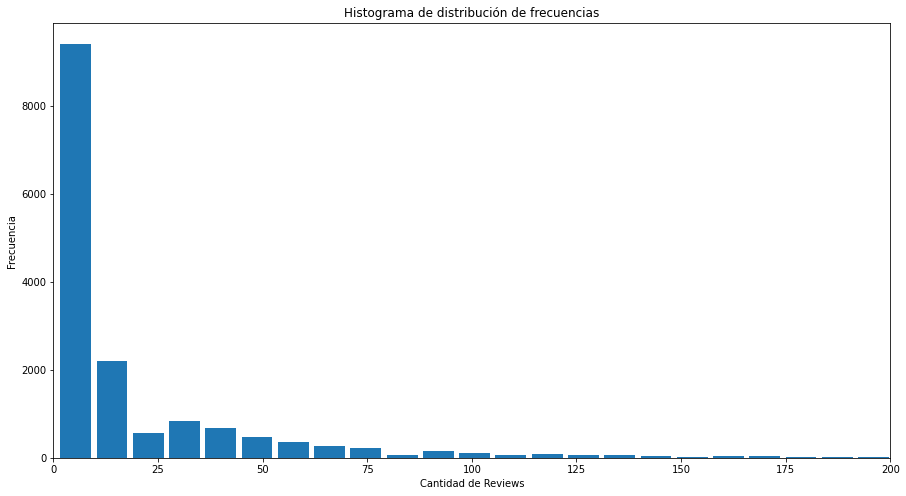

In [ ]:
plt.figure(figsize=(15,8))
plt.hist(x=df['num_of_reviews'], bins=1000, rwidth=0.85)
plt.title('Histograma de distribución de frecuencias')
plt.xlim(0,200) #limitamos el eje x por los outliers
plt.xlabel('Cantidad de Reviews')
plt.ylabel('Frecuencia')
plt.show() #dibujamos el histograma

Analizamos los valores únicos que toma la columna num_of_reviews

In [ ]:
len(df['num_of_reviews'].unique())

270

#####Avg_rating

Observar la distribución de los datos en la columna avg_rating . Son correctos , van de 1 a 5 y tienen un sesgo a la derecha.


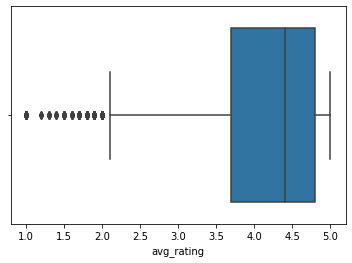

In [ ]:
sns.boxplot(x=df["avg_rating"])

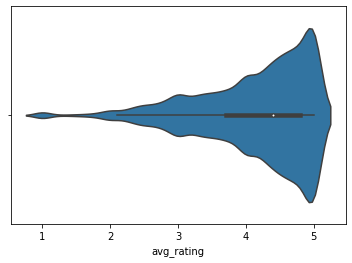

In [ ]:
sns.violinplot(x=df["avg_rating"])

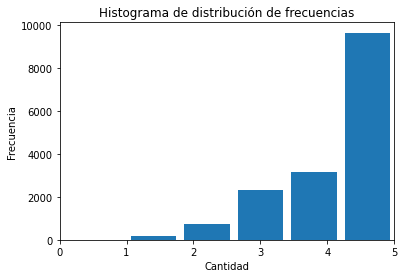

In [ ]:
plt.hist(x=df['avg_rating'], bins=5, rwidth=0.85)
plt.title('Histograma de distribución de frecuencias')
plt.xlim(0,5) #limitamos el eje x 
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.show() #dibujamos el histograma

#### Variables Categóricas

##### Category

Cantidad de categorias

In [ ]:
len(df.category.unique())

2718

In [ ]:
df.category.value_counts()

['Hotel']                                                                                                                                                                                                                                              3507
['Lodging']                                                                                                                                                                                                                                            3176
['Motel']                                                                                                                                                                                                                                               809
['Indoor lodging']                                                                                                                                                                                                                                  

Categorias que mas se repiten

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

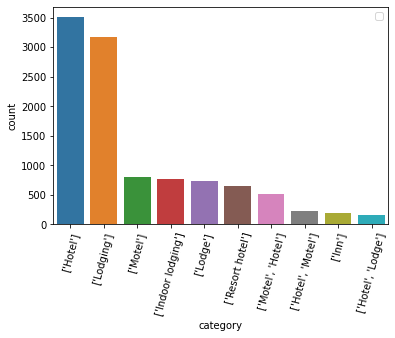

In [ ]:
sns.countplot(x= "category", data=df,order=df["category"].value_counts()[:10].index)
plt.legend(loc="upper right")
plt.xticks(rotation=75)

##### Hours

Cantidad de horarios

In [ ]:
len(df.hours.unique())

203

In [ ]:
df.hours.value_counts()

[['Wednesday', 'Open 24 hours'], ['Thursday', 'Open 24 hours'], ['Friday', 'Open 24 hours'], ['Saturday', 'Open 24 hours'], ['Sunday', 'Open 24 hours'], ['Monday', 'Open 24 hours'], ['Tuesday', 'Open 24 hours']]    7
[['Monday', 'Open 24 hours'], ['Tuesday', 'Open 24 hours'], ['Wednesday', 'Open 24 hours'], ['Thursday', 'Open 24 hours'], ['Friday', 'Open 24 hours'], ['Saturday', 'Open 24 hours'], ['Sunday', 'Open 24 hours']]    6
[['Thursday', 'Open 24 hours'], ['Friday', 'Open 24 hours'], ['Saturday', 'Open 24 hours'], ['Sunday', 'Open 24 hours'], ['Monday', 'Open 24 hours'], ['Tuesday', 'Open 24 hours'], ['Wednesday', 'Open 24 hours']]    5
[['Friday', 'Open 24 hours'], ['Saturday', 'Open 24 hours'], ['Sunday', 'Open 24 hours'], ['Monday', 'Open 24 hours'], ['Tuesday', 'Open 24 hours'], ['Wednesday', 'Open 24 hours'], ['Thursday', 'Open 24 hours']]    5
[['Tuesday', '8AM–5PM'], ['Wednesday', '8AM–5PM'], ['Thursday', '8AM–5PM'], ['Friday', '8AM–5PM'], ['Saturday', 'Closed'], ['Sunday'

Graficamos los horarios que más se repiten.

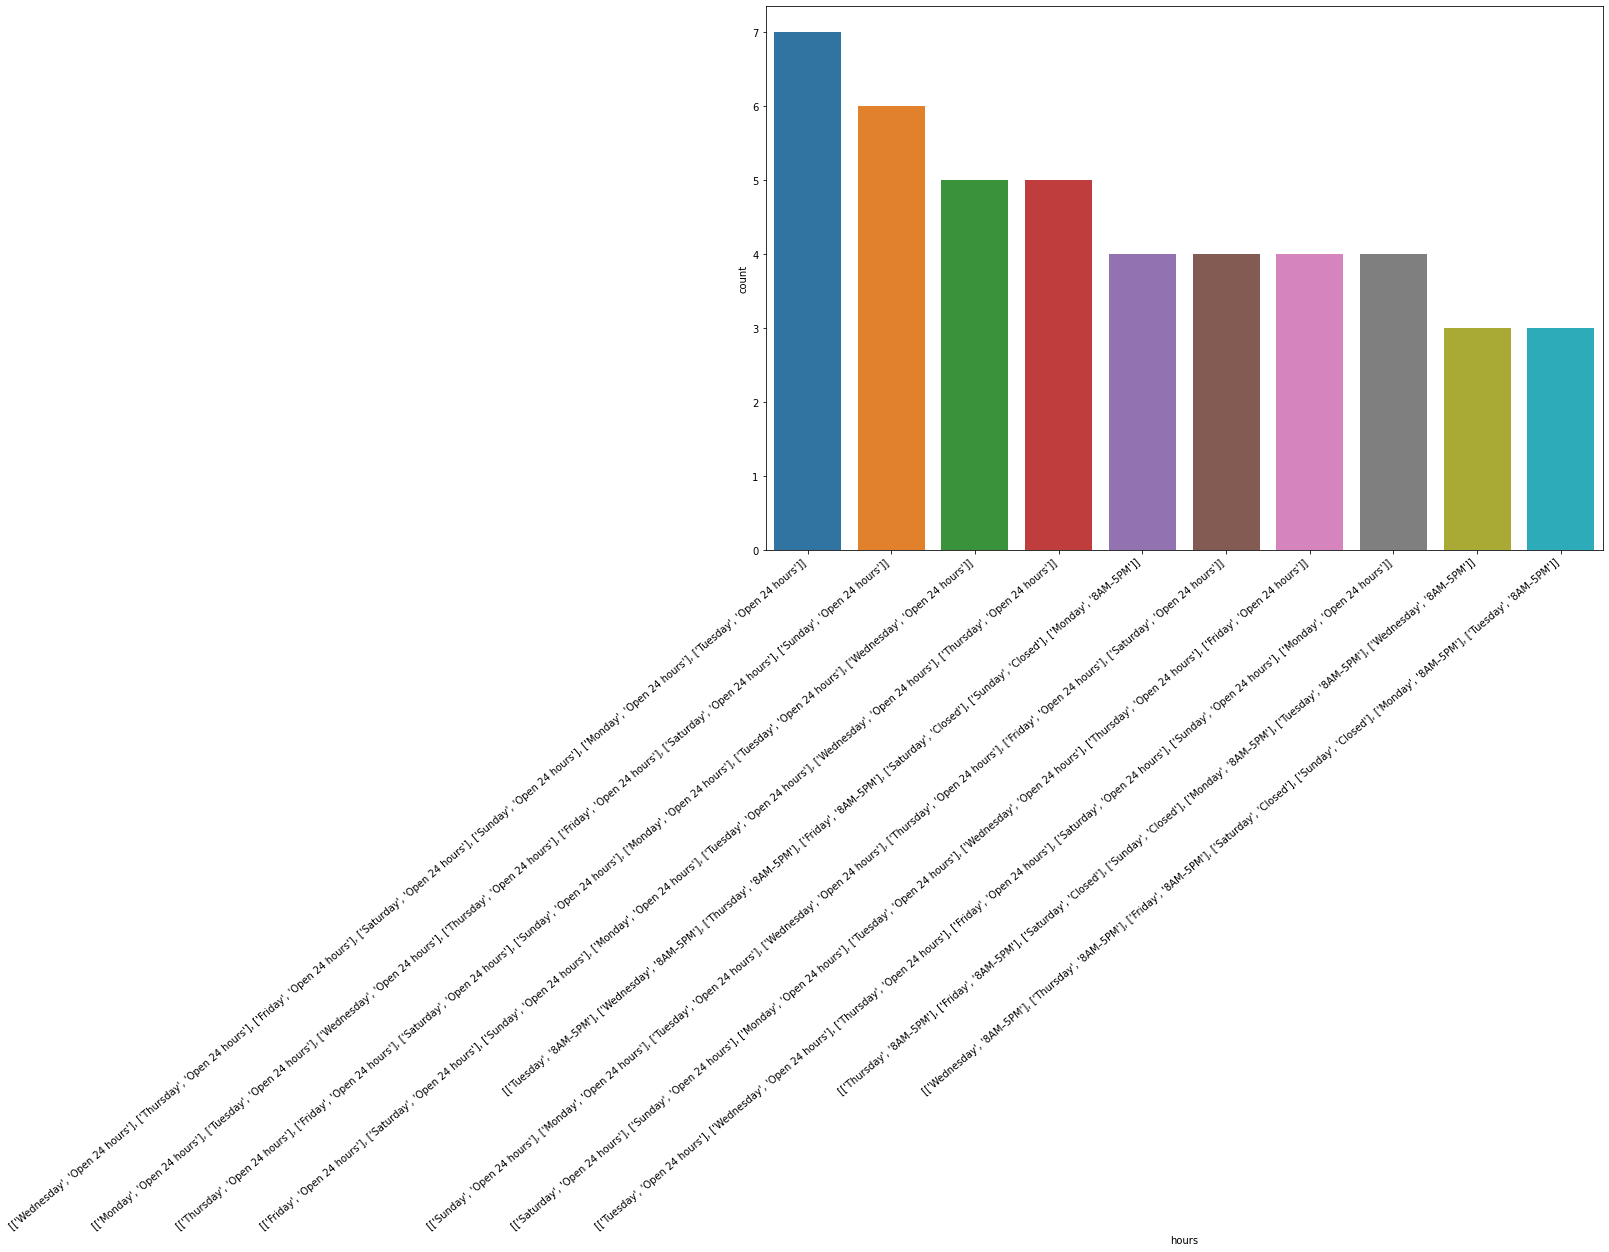

In [ ]:
plt.figure(figsize=(15,10)),
ax = sns.countplot(x= "hours", data=df,order=df["hours"].value_counts()[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

##### MISC

In [ ]:
len(df.MISC.unique())

557

Graficamos los servicios que mas se repiten.

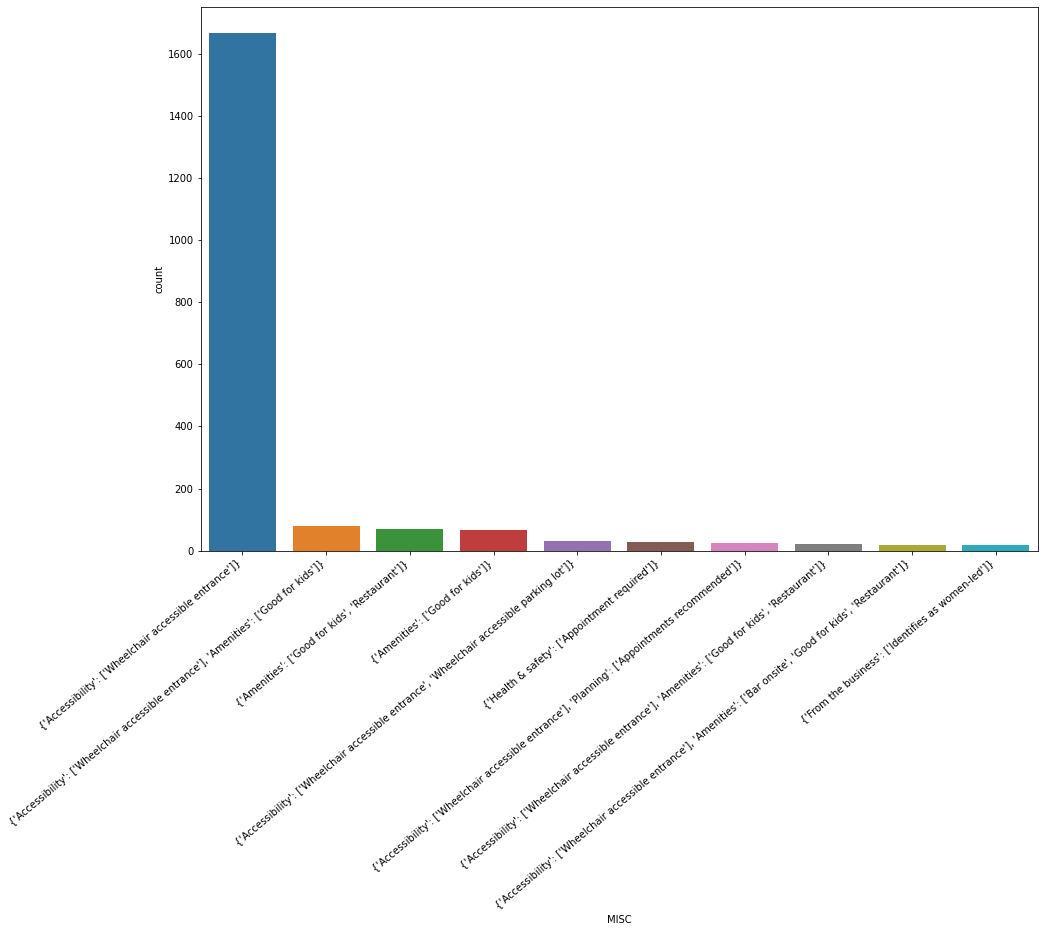

In [ ]:
plt.figure(figsize=(15,10)),
ax = sns.countplot(x= "MISC", data=df,order=df["MISC"].value_counts()[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

##### State (estado del negocio)

In [ ]:
state=df['state'].unique()
state.size

75

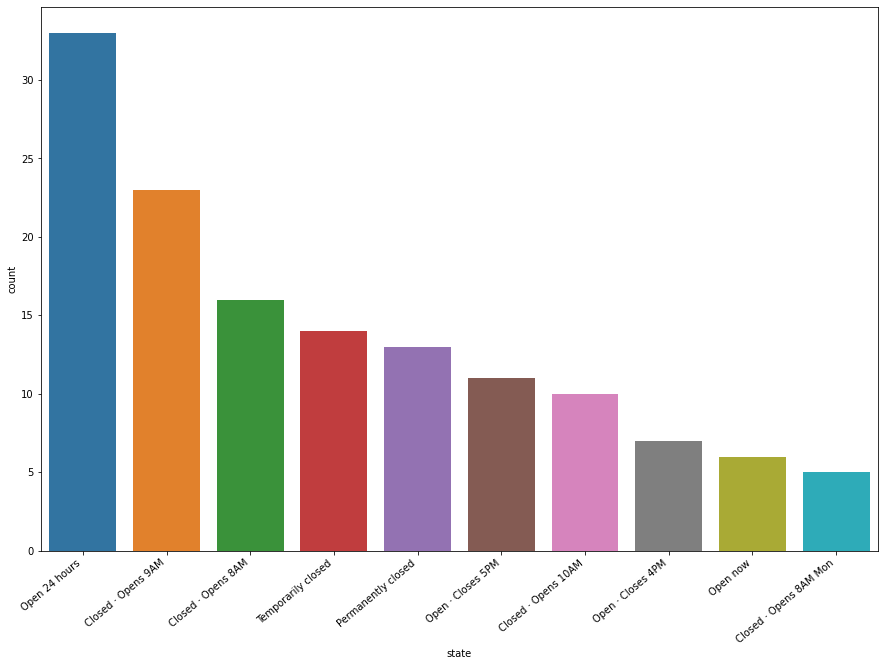

In [ ]:
plt.figure(figsize=(15,10)),
ax = sns.countplot(x= "state", data=df,order=df["state"].value_counts()[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

### Matriz de Correlación

Correlación de variables numéricas

Text(0.5, 1.0, 'Heatmap de correlación del dataset ')

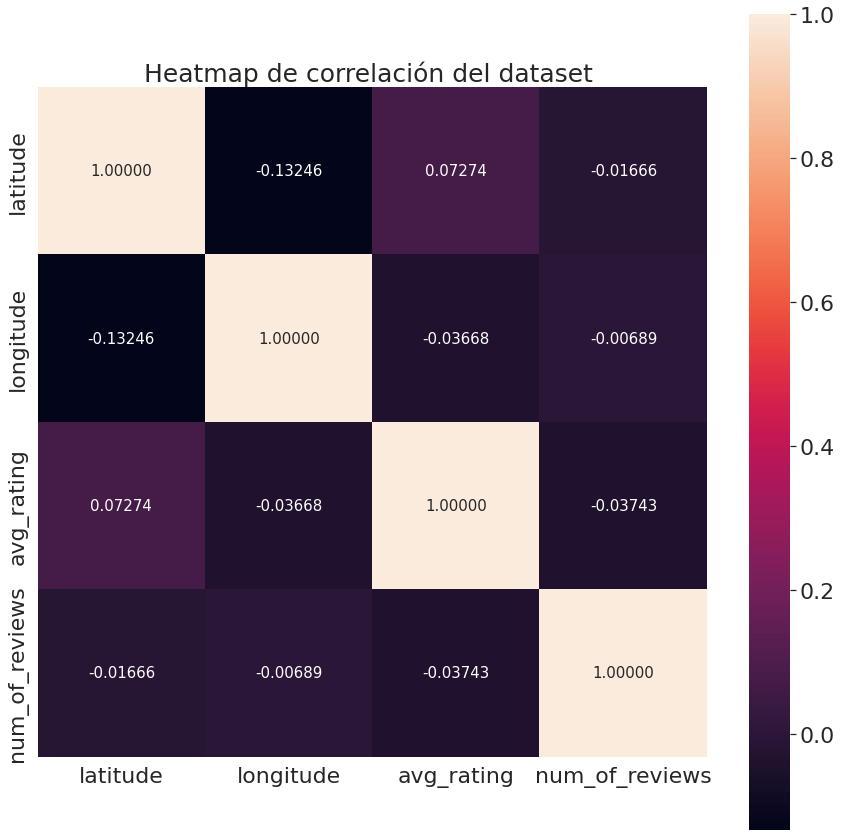

In [ ]:
corr = df.corr()
sns.set(font_scale=2)
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar=True, square= True, fmt='.5f', annot=True, annot_kws={'size':15})
plt.title("Heatmap de correlación del dataset ", fontsize=25)